# Data processing with Pandas

## Importing Necessary Libraries

In [142]:
# Import the Pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Reading the File

In [143]:
file_path = 'DWD_Freiburg_MbisM_Stadt.txt'  # Replace with your file path
colnames = ['Stations ID', 'Zeit', 'QUALITAETS_NIVEAU', 'STRUKTUR_VERSION', 'Lufttemperatur [Grad C]', 'Relative Luftfeuchte [%]', 'eor' ]
# Load the text data into a DataFrame
df = pd.read_csv(file_path, sep=';', names = colnames, header=None, usecols=['Zeit','Lufttemperatur [Grad C]', 'Relative Luftfeuchte [%]'])

# Display the first few rows of the DataFrame
df.head()

,Zeit,Lufttemperatur [Grad C],Relative Luftfeuchte [%]
0,Zeit,Lufttemperatur [Grad C],Relative Luftfeuchte [%]
1,2020030100,9.4,66
2,2020030101,9.3,66
3,2020030102,9.1,60
4,2020030103,8.8,66


## Data Manipulation and Cleaning

In [144]:
# Example: Rename columns
df.rename(columns={'Lufttemperatur [Grad C]': 'Temperature', 'Relative Luftfeuchte [%]': 'Humidity'}, inplace=True)

df.drop(index=0, inplace=True) # to drop/remove rows
# # Example: To drop unnecessary columns:
# df.drop(['Stations ID', 'QUALITAETS_NIVEAU', 'STRUKTUR_VERSION', 'eor'], axis=1, inplace=True) 

# Handling missing values (if necessary)
df.dropna(inplace=True)

df.head()

# df.loc[:,"Zeit"]
# df['Temperature']

,Zeit,Temperature,Humidity
1,2020030100,9.4,66
2,2020030101,9.3,66
3,2020030102,9.1,60
4,2020030103,8.8,66
5,2020030104,9.0,64


In Pandas, when using functions like `drop` and `rename`, the `inplace=True` parameter determines whether the modification is made directly to the original DataFrame. If `inplace=True`, the DataFrame is changed in place, meaning no new DataFrame is created, and the original DataFrame is modified. If `inplace=False` (which is the default), the operation will create and return a new DataFrame with the changes, leaving the original DataFrame unchanged. Using `inplace=True` can be more memory efficient since it doesn't create a new object, but it also means the original data is lost.

## Plotting the time series for Temperature

In [145]:
# First, we need to convert the column data type to numeric with pd.to_numeric(). 
# If we use the option errors='coerce' then it will automatically replace non-numeric characters with NaN.

Zeit = pd.to_numeric(df['Zeit'], errors='coerce')
Temp = pd.to_numeric(df['Temperature'], errors='coerce')
Hum = pd.to_numeric(df['Humidity'], errors='coerce')


Time = pd.to_datetime(Zeit, format='%Y%m%d%H')  # Adjust the format as per the data

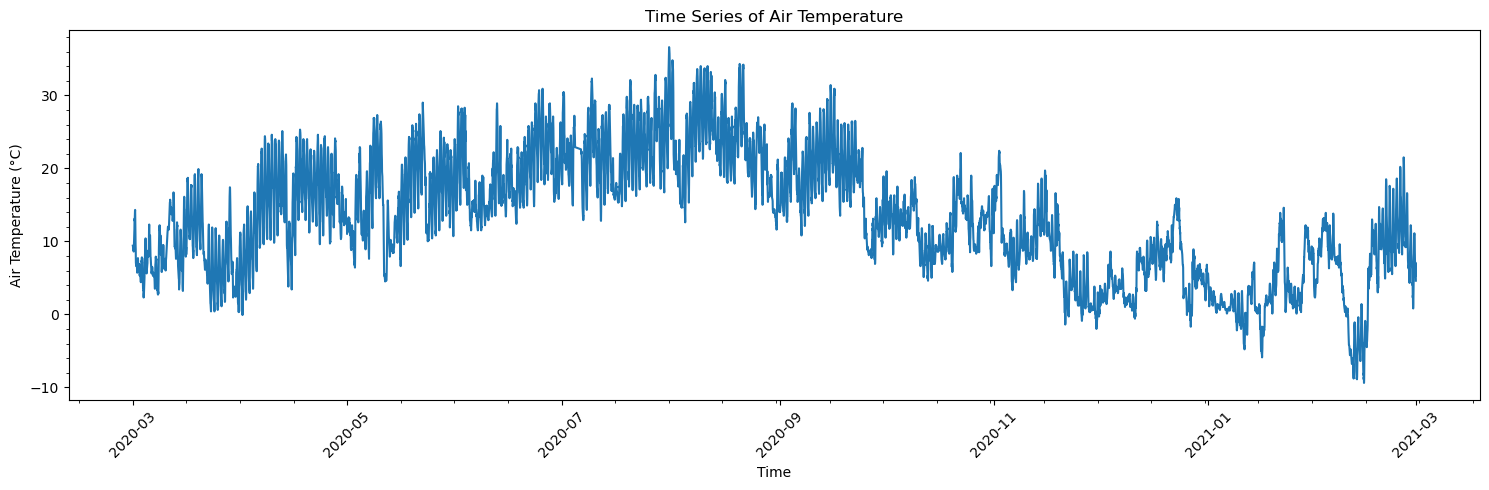

In [161]:
# Plotting the time series
plt.figure(figsize=(15, 5))
plt.plot(Time, Temp)
plt.title('Time Series of Air Temperature')
plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.minorticks_on() # Turns on the minor ticks on x and y axes.
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

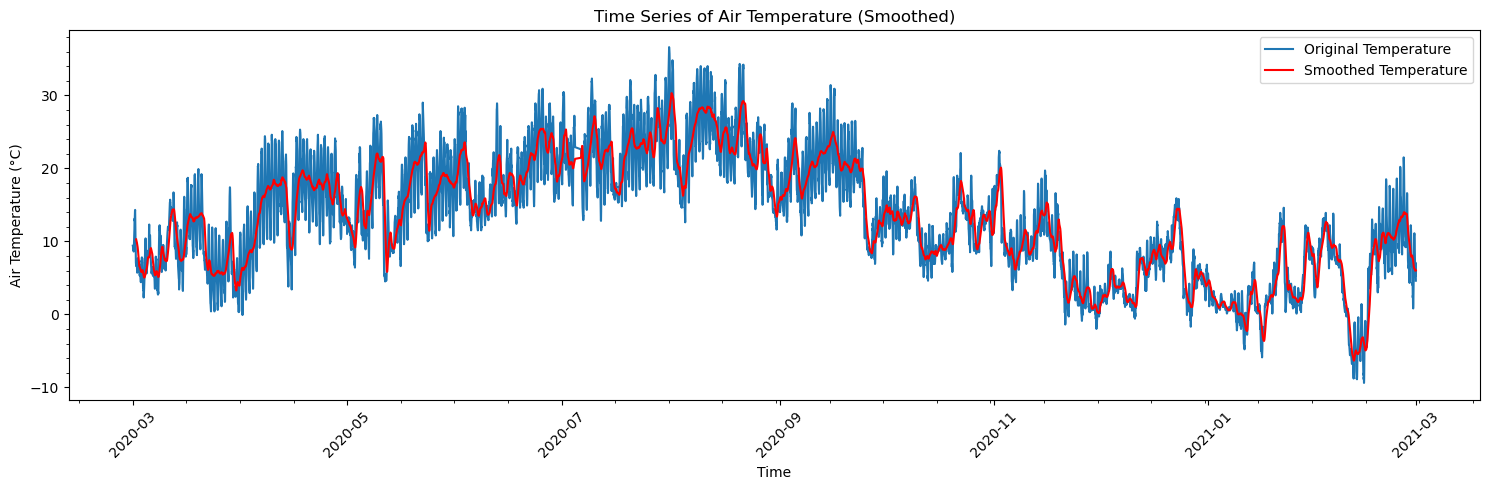

In [159]:
# Calculate the rolling average with a 24-hour window
window_size = 24  # You can adjust this based on your data
Temp_smooth = Temp.rolling(window=window_size).mean()

# Plotting the time series
plt.figure(figsize=(15, 5))
plt.plot(Time, Temp, label='Original Temperature')
plt.plot(Time, Temp_smooth, label='Smoothed Temperature', color='red')
plt.title('Time Series of Air Temperature (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.xticks(rotation=45)
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.show()

A rolling average (or moving average) is commonly used to smooth out short-term fluctuations and highlight longer-term trends in data. For a rolling average, you specify the window size, and the average is calculated for that number of elements at a time, moving one element forward after each calculation. For example, with a window size of 3, the first average is calculated for elements 1, 2, and 3, then the next for elements 2, 3, and 4, and so on. This method is useful in time series analysis and can help in identifying trends and patterns in the data.

## Calculating Correlation

In [148]:

correlation_p = Temp.corr(Hum, method='pearson')
# Calculate and print the correlation coefficient
# correlation = df['Temperature'].corr(df['Humidity'])
print(f"Pearson Correlation coefficient between temperature and humidity: {correlation_p}")

correlation_s = Temp.corr(Hum, method='spearman')
print(f"Spearman Correlation coefficient between temperature and humidity: {correlation_s}")


Pearson Correlation coefficient between temperature and humidity: -0.5392403736875817
Spearman Correlation coefficient between temperature and humidity: -0.6256411546322243


Pearson and Spearman correlations are both statistical measures used to understand the relationship between two variables:

1. **Pearson Correlation**: This measures the linear relationship between two variables. It assumes that the variables are normally distributed and scales from -1 to 1. A value of 1 means a perfect positive linear relationship, -1 means a perfect negative linear relationship, and 0 means no linear relationship.

2. **Spearman Correlation**: This is a non-parametric measure and assesses how well the relationship between two variables can be described using a monotonic function. It doesn’t require the data to be normally distributed and is more appropriate for ordinal data or non-linear relationships.

The key difference is that Pearson is used for linear relationships with continuous and normally distributed data, while Spearman is better for ordinal data or non-linear relationships.

The formulas for Pearson and Spearman correlations are:

1. **Pearson Correlation (r)**: 
   $$ r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}} $$
   Here, $X_i$ and $Y_)$ are the individual sample points, while $\bar{X}$ and $\bar{Y}$ are the means of the $X$ and $Y$ samples, respectively.

2. **Spearman Correlation ($\rho$)**: 
   $$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$
   
    The Spearman correlation coefficient formula can be broken down as follows:

    - $ d_i $ is the difference between the ranks of each pair of corresponding values in the two datasets. For each pair of data points, you rank them in their respective datasets and then find the difference between these ranks. Ranks are determined by ordering the values of each variable separately from the smallest to the largest. Each value is assigned a rank starting from 1 for the smallest value.

    - $ \sum d_i^2 $ is the sum of the squares of these rank differences for all pairs.

    - $ n $ is the number of pairs of data points.

    - The fraction $ \frac{6 \sum d_i^2}{n(n^2 - 1)} $ calculates a scaled sum of the squared rank differences.

    - Finally, $ 1 - $ this fraction gives the Spearman correlation coefficient, which ranges between -1 and 1. A value of -1 indicates a perfect negative monotonic relationship, +1 indicates a perfect positive monotonic relationship, and 0 indicates no monotonic relationship.

Pearson's formula calculates the linear relationship directly from the raw data, whereas Spearman's formula uses rank values, making it less sensitive to outliers and non-normal distributions.

## Curve Fitting

In [149]:
# importing curve_fit function from SCIPY library
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear_model, Temp, Hum)
# popt contains parameters a and b of the function above.
# pcov is the covariance matrix
print(popt)
print(pcov)

[-1.45462251 84.39367561]
[[ 0.00059204 -0.00783744]
 [-0.00783744  0.14376825]]



In the `curve_fit` function from SciPy, `popt` and `pcov` are two important outputs:

1. **popt**: This stands for "optimal parameters." When you use `curve_fit`, it tries to find the best-fit parameters for your data, based on the model function you've provided. `popt` is an array of these best-fit parameters. For example, if your model is a linear function with parameters for slope and intercept (i.e., `a` and `b` in above), `popt` will contain the values for these parameters that best fit your data.

2. **pcov**: This is the "covariance of the parameters" found by the curve fitting. Essentially, it's a measure of how much the parameters depend on each other. In statistical terms, it gives you an idea of the precision of the estimated parameters. The diagonal elements of this matrix are the variances of each parameter. The square root of these diagonal elements can give you the standard deviation of each parameter, which is often used as an estimate of their uncertainty.

To understand it simply, `popt` gives you the best-fit parameters, and `pcov` helps you understand how certain or uncertain those parameters are.

You can read the documentation of the curve_fit function here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
Wikipedia page on covariance:
https://en.wikipedia.org/wiki/Covariance

## Other possible functions for curve fitting

Besides linear functions, other common functions for curve fitting include:

1. **Polynomial Function**: Fits data to a polynomial of degree n. For example, a quadratic function (degree 2) would be `y = ax^2 + bx + c`.

2. **Exponential Function**: Useful for data that rises or falls at rates proportional to its current value. Expressed as `y = a * exp(b * x)`.

3. **Logarithmic Function**: Suitable for data following a pattern of rapid growth or decay initially that slows down later. It's in the form `y = a + b * log(x)`.

4. **Power Function**: Good for data exhibiting a polynomial relationship. The form is `y = a * x^b`.

In [153]:
# This code below provides a basic structure for fitting different types of functions to a set of data points 
# and visualizing the results. Adjustments might be needed depending on the specific characteristics of the dataset.
# Polynomial function
def poly_func(x, a, b, c):
    return a * x**2 + b * x + c

# Exponential function
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Logarithmic function
def log_func(x, a, b):
    return a + b * np.log(x)

# Power function
def power_func(x, a, b):
    return a * x**b

# Fit these functions to your data
# popt_poly, pcov_poly = curve_fit(poly_func, x_data, y_data)
# popt_exp, pcov_exp = curve_fit(exp_func, x_data, y_data)
# popt_log, pcov_log = curve_fit(log_func, x_data, y_data)
# popt_power, pcov_power = curve_fit(power_func, x_data, y_data)

## Plotting the Results

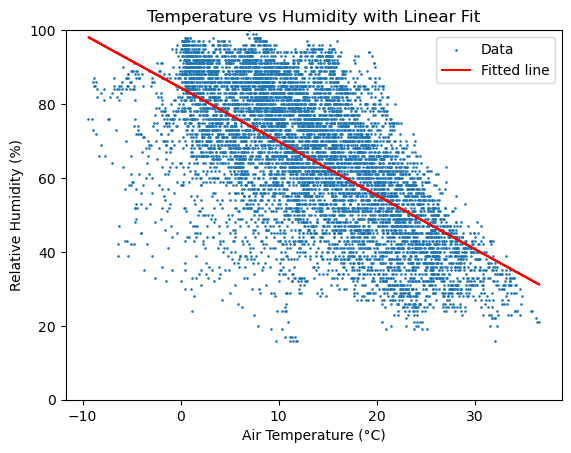

In [150]:
plt.scatter(Temp, Hum, label='Data',s=0.8)
plt.plot(Temp, linear_model(Temp, *popt), color='red', label='Fitted line')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.title('Temperature vs Humidity with Linear Fit')
plt.ylim(0,100)
plt.legend()
plt.show()


The figure shows a negative linear correlation between humidity and temperature. As temperature increases, humidity decreases, which aligns with the negative sign observed in our correlation analysis output before.